<a href="https://colab.research.google.com/github/Aj6398/Projects/blob/main/Solar_Generation_Forcasting_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from sklearn import preprocessing
from statsmodels.tsa.stattools import pacf
%matplotlib inline
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping
pd.set_option('display.max_colwidth',1000000000)
# Any results you write to the current directory are saved as output.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/JanDec2020_final.csv")

In [7]:
df.head(24)

,Time,Energy
0,01-01-2020 00:00,0.0000
1,01-01-2020 01:00,0.0000
2,01-01-2020 02:00,0.0000
3,01-01-2020 03:00,0.0000
4,01-01-2020 04:00,0.0000
5,01-01-2020 05:00,0.0000
6,01-01-2020 06:00,4.5000
7,01-01-2020 07:00,70.9167
8,01-01-2020 08:00,464.2500
9,01-01-2020 09:00,1161.4167


In [8]:
df.tail(24)

,Time,Energy
8760,31-12-2020 00:00,0.0000
8761,31-12-2020 01:00,0.0000
8762,31-12-2020 02:00,0.0000
8763,31-12-2020 03:00,0.0000
8764,31-12-2020 04:00,0.0000
8765,31-12-2020 05:00,0.0000
8766,31-12-2020 06:00,0.0000
8767,31-12-2020 07:00,37.2500
8768,31-12-2020 08:00,349.0000
8769,31-12-2020 09:00,899.9167


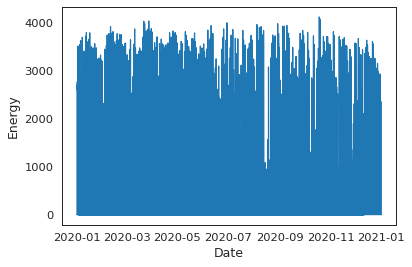

In [9]:
## Giving plot captions
df['Time'] = pd.to_datetime(df['Time'],infer_datetime_format=True) 
df1 = df.set_index(['Time'])

plt.xlabel('Date')
plt.ylabel('Energy')
plt.plot(df1)

In [10]:
############**********LSTM**********############
# making data again to remove inconsistencies
temp = df
dataset = temp['Energy'].dropna().values #numpy.ndarray
print(len(dataset))
print(type(dataset))
# for i in range(0,25):
#   print(dataset[i,0])
# print(len(dataset))

dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
for i in range(0,48):
  print(dataset[i,])
print(len(dataset))

train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size

train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


# print(dataset)
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0] 
        X.append(a) 
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

    
look_back = 23
print(train)
print(test)

X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)


print(X_test[56,1])

print(len(Y_train))
print(len(Y_test))
print(len(X_train))
print(len(X_test))
print(len(dataset))


# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
# X_train
# X_test




8784
<class 'numpy.ndarray'>
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.00109335]
[0.01723044]
[0.11279763]
[0.28218642]
[0.6691121]
[0.6164084]
[0.67200375]
[0.63074344]
[0.6535824]
[0.36801466]
[0.15695696]
[0.04745964]
[0.00052643]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.01255332]
[0.10613628]
[0.22620268]
[0.31371143]
[0.33300713]
[0.552103]
[0.28155878]
[0.26623157]
[0.10775606]
[0.14458586]
[0.01018254]
[0.]
[0.]
[0.]
[0.]
[0.]
[0.]
8784
[[0.        ]
 [0.        ]
 [0.        ]
 ...
 [0.11022622]
 [0.03865612]
 [0.        ]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0.0
7003
1733
7003
1733
8784


In [11]:
model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=200, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)

model.summary()

Epoch 1/200
101/101 [==============================] - 4s 11ms/step - loss: 0.0271 - val_loss: 0.0081
Epoch 2/200
101/101 [==============================] - 1s 5ms/step - loss: 0.0092 - val_loss: 0.0046
Epoch 3/200
101/101 [==============================] - 0s 5ms/step - loss: 0.0076 - val_loss: 0.0036
Epoch 4/200
101/101 [==============================] - 1s 5ms/step - loss: 0.0069 - val_loss: 0.0034
Epoch 5/200
101/101 [==============================] - 1s 5ms/step - loss: 0.0066 - val_loss: 0.0029
Epoch 6/200
101/101 [==============================] - 0s 5ms/step - loss: 0.0061 - val_loss: 0.0029
Epoch 7/200
101/101 [==============================] - 1s 5ms/step - loss: 0.0059 - val_loss: 0.0028
Epoch 8/200
101/101 [==============================] - 0s 5ms/step - loss: 0.0057 - val_loss: 0.0028
Epoch 9/200
101/101 [==============================] - 1s 5ms/step - loss: 0.0057 - val_loss: 0.0028
Epoch 10/200
101/101 [==============================] - 1s 5ms/step - loss: 0.0056 - val_l

In [12]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 143.51940009544984
Train Root Mean Squared Error: 274.832159467749
Test Mean Absolute Error: 116.17546103340065
Test Root Mean Squared Error: 205.369185135535


In [13]:
# mape_train = np.mean(np.abs((Y_train[0] - train_predict[:,0]) / Y_train[0])) * 100
# mape_test = np.mean(np.abs((Y_test[0] - test_predict[:,0]) / Y_test[0])) * 100

# print("Train MAPE: {}, Test MAPE: {}".format(mape_train, mape_test))

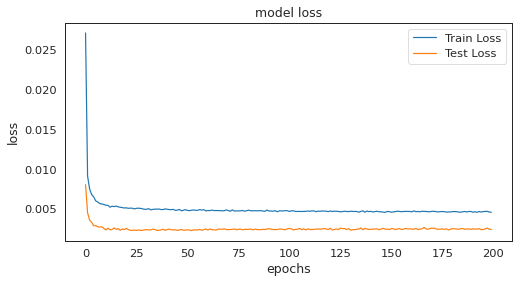

In [14]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

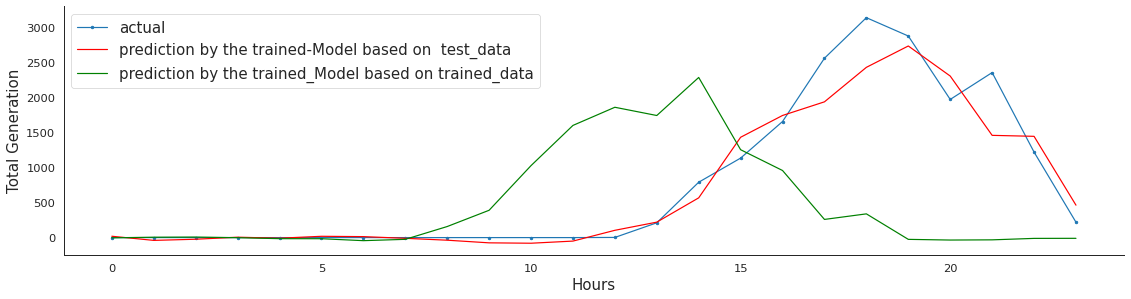

In [15]:
# idx = 1720 ## max.. As we have Total Testing data 
idx = 24
aa=[x for x in range(idx)]
plt.figure(figsize=(16,4))
plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:idx], 'r', label="prediction by the trained-Model based on  test_data")
plt.plot(aa, train_predict[:,0][:idx], 'g', label="prediction by the trained_Model based on trained_data")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Total Generation', size=15)
plt.xlabel('Hours', size=15)
plt.legend(fontsize=15)
plt.show();

In [16]:
X_test.shape

(1733, 1, 23)

In [17]:
X_train.shape

(7003, 1, 23)

In [18]:
X_test[0].shape

(1, 23)

In [19]:
type(X_test)

numpy.ndarray

In [20]:
X_test

array([[[0.        , 0.        , 0.        , ..., 0.2598132 ,
         0.1367465 , 0.01733904]],

       [[0.        , 0.        , 0.        , ..., 0.1367465 ,
         0.01733904, 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.01733904,
         0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        , ..., 0.04355743,
         0.00107311, 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.00107311,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]]], dtype=float32)

In [21]:
# fut = np.random.rand(10000,1,23)

In [22]:
# fut_predict = model.predict(fut)
# fut_predict

In [23]:
# fut_predict.shape

In [24]:
# test_predict = model.predict(X_test)

In [25]:
# test_predict.shape

In [26]:
### Now, Tarin model for the all the data....
all_data = dataset[:,:]
X_Total, Y_Total = create_dataset(all_data, look_back)
print(len(all_data))
print(len(X_Total))

X_Total = np.reshape(X_Total, (X_Total.shape[0], 1, X_Total.shape[1]))
print(len(X_Total))

8784
8760
8760


In [27]:
model_Total = Sequential()
model_Total.add(LSTM(100, input_shape=(X_Total.shape[1], X_Total.shape[2])))
model_Total.add(Dropout(0.2))
model_Total.add(Dense(1))
model_Total.compile(loss='mean_squared_error', optimizer='adam')

# history = model_Total.fit(X_Total, Y_Total, epochs=200, batch_size=70, validation_data=(X_test, Y_test),verbose=1, shuffle=False)
history = model_Total.fit(X_Total, Y_Total, epochs=200, batch_size=70, verbose=1, shuffle=False)

model.summary()

Epoch 1/200
126/126 [==============================] - 2s 4ms/step - loss: 0.0221
Epoch 2/200
126/126 [==============================] - 0s 4ms/step - loss: 0.0074
Epoch 3/200
126/126 [==============================] - 0s 4ms/step - loss: 0.0064
Epoch 4/200
126/126 [==============================] - 0s 4ms/step - loss: 0.0060
Epoch 5/200
126/126 [==============================] - 0s 4ms/step - loss: 0.0055
Epoch 6/200
126/126 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 7/200
126/126 [==============================] - 0s 4ms/step - loss: 0.0052
Epoch 8/200
126/126 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 9/200
126/126 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 10/200
126/126 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 11/200
126/126 [==============================] - 0s 4ms/step - loss: 0.0049
Epoch 12/200
126/126 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 13/200


In [28]:
Total_train_predict = model.predict(X_Total)
# test_predict = model.predict(X_test)
# invert predictions
Total_train_predict = scaler.inverse_transform(Total_train_predict)
# Y_train = scaler.inverse_transform([Y_train])
# test_predict = scaler.inverse_transform(test_predict)
# Y_test = scaler.inverse_transform([Y_test])

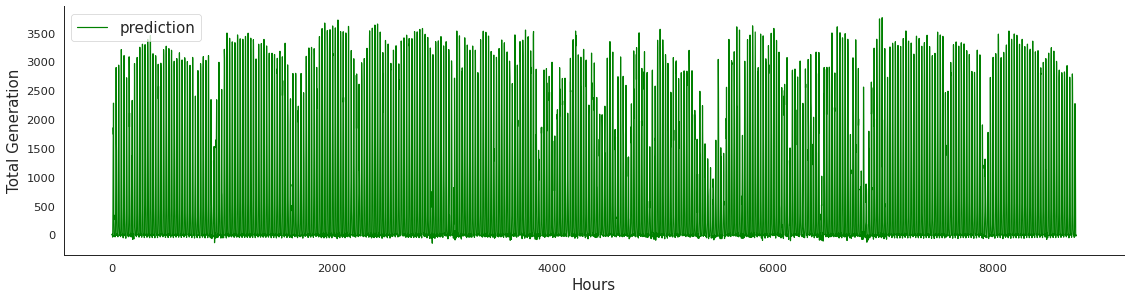

In [29]:
## Now Plot Solar generation for the next year 2021
idx = 8760
aa=[x for x in range(idx)]
plt.figure(figsize=(16,4))
# plt.plot(aa, Y_test[0][:idx], marker='.', label="actual")
plt.plot(aa, Total_train_predict[:,0][:idx], 'g', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Total Generation', size=15)
plt.xlabel('Hours', size=15)
plt.legend(fontsize=15)
plt.show();